<a href="https://colab.research.google.com/github/Carlos1729/todojson/blob/main/PytorchWorkflow_Madhukar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data preperation and loading

In [3]:
W = 0.7
b = 0.3

start = 0
end = 1
step = 0.02
# X = torch.arange(start,end,step);

In [4]:
x = torch.arange(start,end,step);
x

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [5]:
x = x.unsqueeze(1)
x

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [6]:
y = W*x + b
y[0:10],x[0:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [7]:
len(x), len(y)

(50, 50)

In [8]:
train_split = int(0.8*len(x))
x_train,y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]#scikit learn train test split is also there which we can see in future
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [9]:
x_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [10]:
#how to better visulaize this data

In [11]:
def plot_predictions(train_data= x_train,train_labels=y_train,test_data= x_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b", s=4, label="Training Data")#b here means blue
  plt.scatter(test_data, test_labels,c="g", s=4, label="Training Data")#g here means color
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r", s=4, label="Training Data")#g here means color
  plt.legend(prop={"size" : 14});

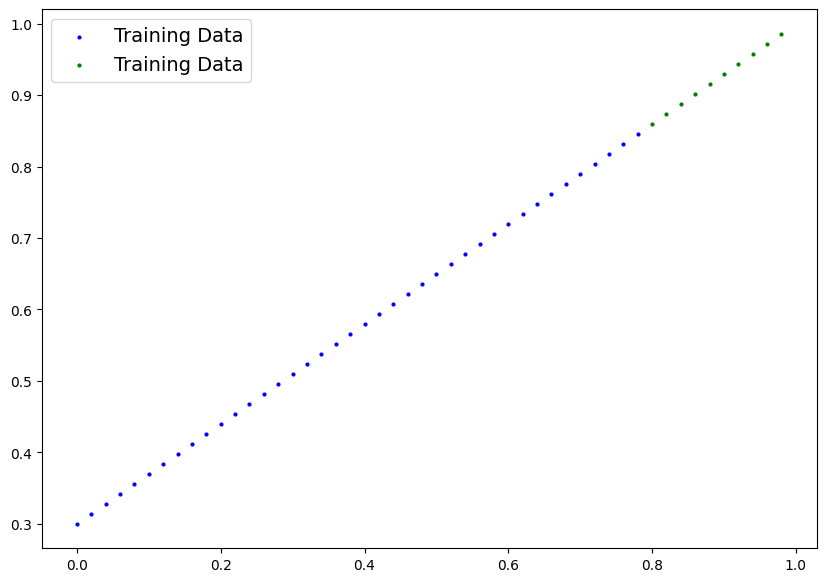

In [12]:
plot_predictions()

In [13]:
#building the model - linear regression model

In [14]:
class lrm(nn.Module):#almost every class in pytorch imports nn.module
  def __init__(self):#creating constructor init w and b
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1))
    self.bias = nn.Parameter(torch.randn(1))#reqires grad is true is for kepping the track of the gradient of given variable during
    #  its learming

  #now forward prop
  def forward(self, x):
    return self.weights*x+self.bias

In [15]:
# torch.nn - contains all building blocks for nn
# torch.nn.parameter - what params should our model try and learn
# torch.nn.module - the base class for all neural networks if you inherit it you should override forward
# torch.optim - this is where optimizers in pytorch live the will help with gradient descent
# def forward() - all nn.module subclasses will override it basically computes the forward value

In [16]:
torch.manual_seed(42)

model_0 = lrm()

model_0

list(model_0.parameters())#because of random seed irrespective how many times you run this you will have these params

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [19]:
W, b

(0.7, 0.3)

In [20]:
with torch.inference_mode():#same as torch.no_grad
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [21]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

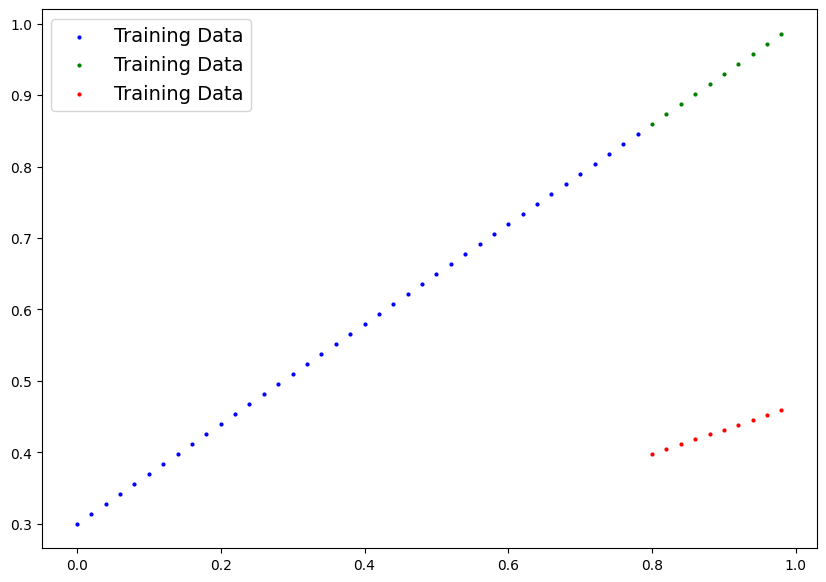

In [22]:
plot_predictions(predictions=y_preds)

In [23]:
#loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),lr=0.01)#optimizer optimizes the given parametersw with given learning rate

In [24]:
epochs = 200#hyperparameter as we are setting it ourself

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()#getting model into train mode
  y_preds = model_0(x_train)#forward pass
  loss = loss_fn(y_preds,y_train)#calc loss
  optimizer.zero_grad()#0,0,0,0,0,0,0,0,0
  loss.backward()#perform backpropogation
  optimizer.step()#1,2,3,4,5,6,7,8
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test);#do the forward pass
    test_loss = loss_fn(test_pred,y_test)

  epoch_count.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)
  print(loss, test_loss)
  print(model_0.state_dict())

tensor(0.3129, grad_fn=<MeanBackward0>) tensor(0.4811)
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.3014, grad_fn=<MeanBackward0>) tensor(0.4676)
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
tensor(0.2898, grad_fn=<MeanBackward0>) tensor(0.4541)
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
tensor(0.2783, grad_fn=<MeanBackward0>) tensor(0.4407)
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
tensor(0.2668, grad_fn=<MeanBackward0>) tensor(0.4272)
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
tensor(0.2553, grad_fn=<MeanBackward0>) tensor(0.4137)
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
tensor(0.2438, grad_fn=<MeanBackward0>) tensor(0.4002)
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
tensor(0.2322, grad_fn=<MeanBackward0>) tensor(0.3868)
OrderedDict([('weights', tensor([0.3679])), ('bia

In [25]:
# In deep learning and neural network training, the optimization process involves iteratively updating the model's parameters (weights and biases) to minimize the loss function. The code you provided is a common training loop for training a neural network model. Let's break down the purpose of `optimizer.zero_grad()` and `optimizer.step()`:

# 1. `optimizer.zero_grad()`: In PyTorch, when you perform gradient descent to update the model parameters, the gradients are accumulated in each parameter's `.grad` attribute during the backward pass. If you call the backward pass (`loss.backward()`) multiple times, these gradients would accumulate, potentially leading to incorrect updates. `optimizer.zero_grad()` is used to reset all gradients to zero before computing the gradients for the current batch. This ensures that each batch's gradients are computed independently and don't interfere with each other.

# 2. `loss.backward()`: This step computes the gradients of the loss function with respect to the model's parameters using the backpropagation algorithm. These gradients indicate how each parameter should be adjusted to reduce the loss.

# 3. `optimizer.step()`: After the gradients have been computed using `loss.backward()`, the optimizer is used to update the model's parameters. The optimizer's `step()` function performs the actual parameter updates based on the gradients. It applies the optimization algorithm (e.g., stochastic gradient descent, Adam, RMSprop) to update the model's parameters in the direction that minimizes the loss.

# In your provided code, this sequence of steps ensures that the model's parameters are updated iteratively based on the computed gradients, moving the model towards better performance in terms of reducing the loss. This process is repeated for each epoch in the training loop, gradually improving the model's ability to make accurate predictions on the training data.

### In summary, `optimizer.zero_grad()` prevents gradient accumulation across batches, `loss.backward()` computes gradients, and `optimizer.step()` updates the model's parameters based on those gradients. This trio of operations is essential for the training of neural network models.

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [27]:
with torch.inference_mode():#same as torch.no_grad
  y_preds = model_0(x_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

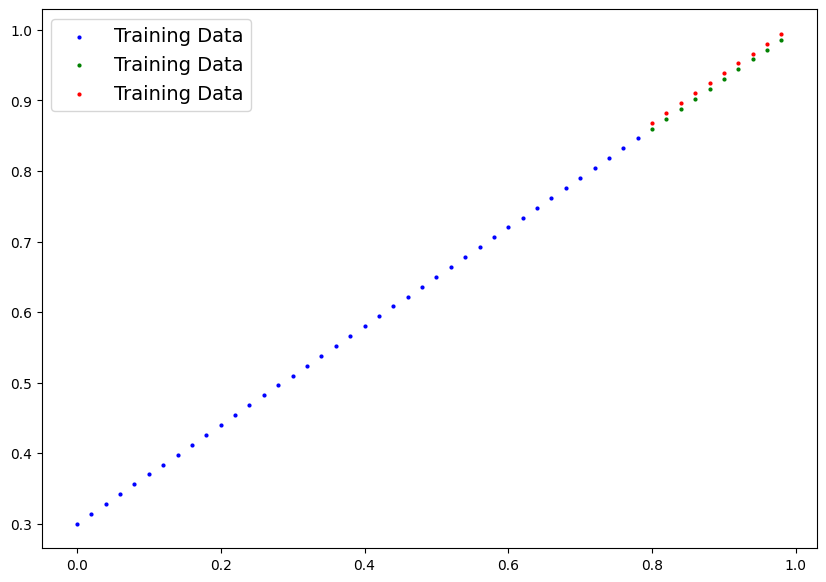

In [28]:
plot_predictions(predictions=y_preds)

In [29]:
#plot loss curves

In [30]:
epoch_count, loss_values, test_loss_values

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

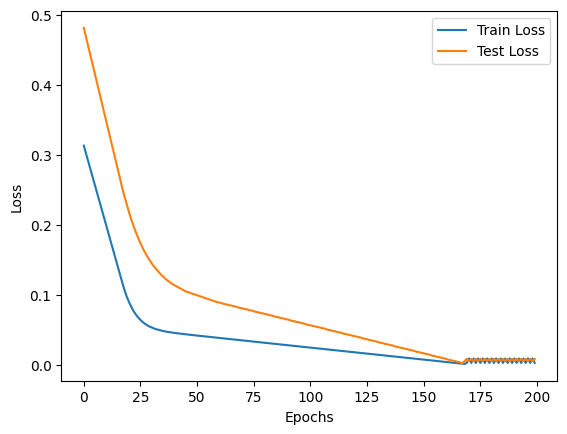

In [31]:
plt.plot(epoch_count ,np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count ,test_loss_values, label = "Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [34]:
#saving a model vs saving state dict(recommended)

In [36]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)
MODEL_NAME = "madhukar_lgm_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH

torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [38]:
loaded_model_0 = lrm()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [39]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

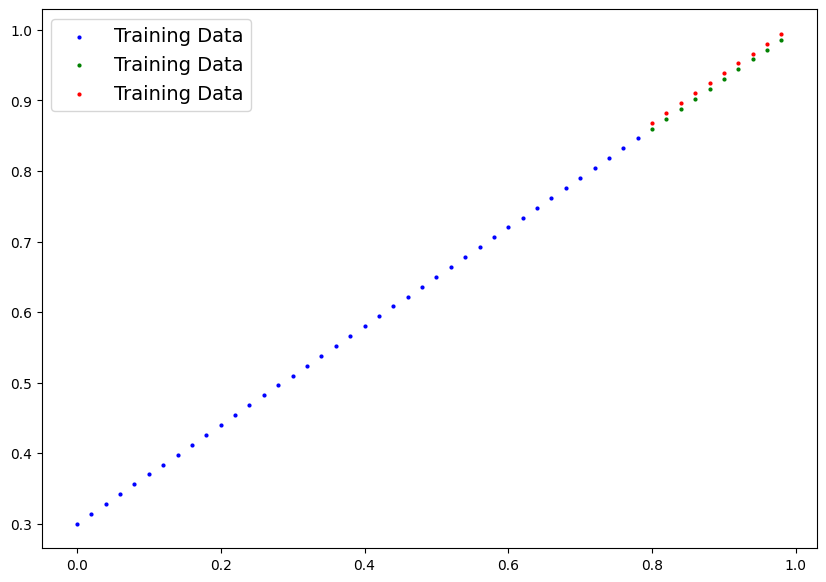

In [40]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

plot_predictions(predictions=loaded_model_preds)